In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Images', 'data.csv']


In [2]:
df =  pd.read_csv("../input/data.csv")
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [3]:
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_23_ba
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_28_la
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_13_daa
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7


In [4]:
df.shape

(92000, 1025)

In [5]:
train_df = df[0:80000].copy()
test_df = df[80000:].copy()
train_df.shape,test_df.shape

((80000, 1025), (12000, 1025))

In [6]:
label = train_df['character'].values
y_train = np.zeros([train_df.shape[0],df['character'].unique().shape[0]])

In [7]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y_train = binencoder.fit_transform(label)

In [8]:
train_df = train_df.drop(['character'],axis=1)
X_train = train_df.as_matrix()
X_train = np.reshape(X_train,(X_train.shape[0],32,32,1))

In [9]:
X_train.shape

(80000, 32, 32, 1)

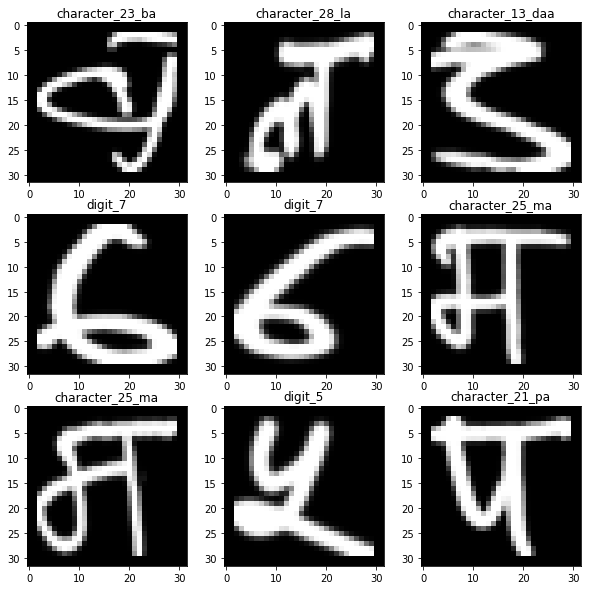

In [10]:
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.title(str(label[i]))
    plt.imshow(X_train[i].reshape((32,32)),cmap='gray')
# show the plot
plt.show()

In [11]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
def alpha_model(input_shape):
    X_in = Input(input_shape)
    
    X = Conv2D(16,kernel_size=(5,5),padding='same',input_shape=input_shape)(X_in)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Conv2D(16,kernel_size=(5,5),padding='same',input_shape=input_shape)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    X = Dense(128,activation='relu')(X)
    X = Dense(46,activation='softmax')(X)
    
    model = Model(inputs=X_in,outputs=X,name='devanagari')
    return model

In [13]:
model = alpha_model((32,32,1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        6416      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 16)        64        
__________

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist = model.fit(X_train,y_train,batch_size=128,epochs=10, verbose=1, validation_split= 0.05)

Train on 76000 samples, validate on 4000 samples
Epoch 1/10
76000/76000 [==============================] - 12s 157us/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0309 - val_acc: 0.9902
Epoch 2/10
76000/76000 [==============================] - 11s 147us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0408 - val_acc: 0.9885
Epoch 3/10
76000/76000 [==============================] - 11s 148us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.0305 - val_acc: 0.9892
Epoch 4/10
76000/76000 [==============================] - 11s 148us/step - loss: 0.0074 - acc: 0.9975 - val_loss: 0.0645 - val_acc: 0.9855
Epoch 5/10
76000/76000 [==============================] - 11s 149us/step - loss: 0.0084 - acc: 0.9971 - val_loss: 0.0776 - val_acc: 0.9825
Epoch 6/10
76000/76000 [==============================] - 11s 148us/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0413 - val_acc: 0.9902
Epoch 7/10
76000/76000 [==============================] - 11s 148us/step - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0

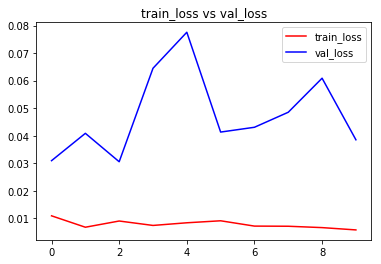

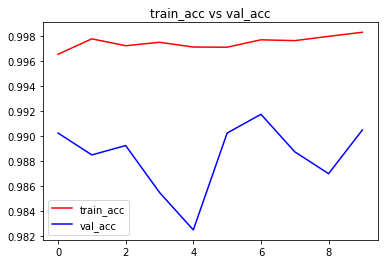

In [32]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

model.save('my_model.h5')

In [21]:
label_test = test_df['character'].values
y_test = np.zeros([train_df.shape[0],df['character'].unique().shape[0]])
binencoder = LabelBinarizer()
y_test = binencoder.fit_transform(label_test)
test_df = test_df.drop(['character'],axis=1)
X_test = test_df.as_matrix()
X_test = np.reshape(X_test,(X_test.shape[0],32,32,1))

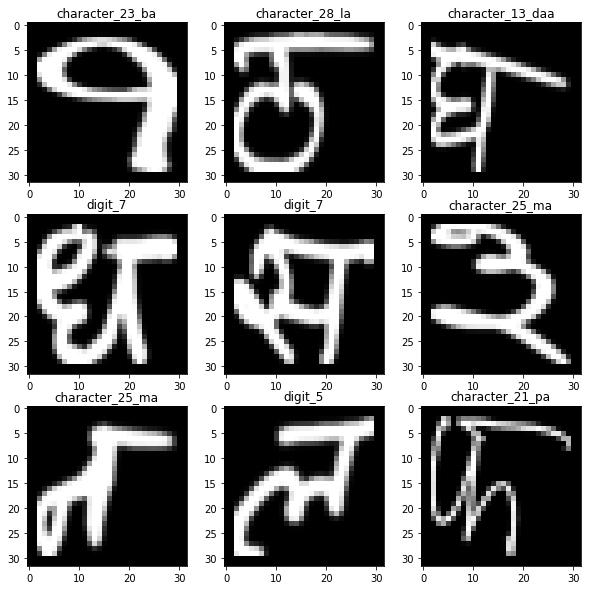

In [29]:
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.title(str(label[i]))
    plt.imshow(X_test[i].reshape((32,32)),cmap='gray')
    # show the plot
plt.show()